# Modèle DALL-E 2 et Python

Pour tester les exemples présentés dans ce chapitre:

<p class="badges">

<a href="https://github.com/linogaliana/python-datascientist/blob/master/notebooks/course/modern-ds/dallE.ipynb" class="github"><i class="fab fa-github"></i></a>
<a href="https://downgit.github.io/#/home?url=https://github.com/linogaliana/python-datascientist/blob/master/notebooks/course/modern-ds/dallE.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/Download-Notebook-important?logo=Jupyter" alt="Download"></a>
<a href="https://nbviewer.jupyter.org/github/linogaliana/python-datascientist/blob/master/notebooks/course/modern-ds/dallE.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/Visualize-nbviewer-blue?logo=Jupyter" alt="nbviewer"></a>
<a href="https://datalab.sspcloud.fr/launcher/inseefrlab-helm-charts-datascience/jupyter?autoLaunch=true&onyxia.friendlyName=%C2%ABpython-datascience%C2%BB&init.personalInit=%C2%ABhttps%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmaster%2Fsspcloud%2Finit-jupyter.sh%C2%BB&init.personalInitArgs=%C2%ABnotebooks/course/modern-ds/dallE.ipynb%C2%BB&security.allowlist.enabled=false" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&amp;color=yellow?logo=Python" alt="Onyxia"></a><br>
<a href="https://mybinder.org/v2/gh/linogaliana/python-datascientist/master?filepath={binder_path}" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/Launch-Binder-E66581.svg?logo=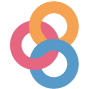" alt="Binder"></a>
<a href="http://colab.research.google.com/github/linogaliana/python-datascientist/blob/master/notebooks/course/modern-ds/dallE.ipynb" target="_blank" rel="noopener"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
<a href="https://github.dev/linogaliana/python-datascientist/notebooks/course/modern-ds/dallE.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/static/v1?logo=visualstudiocode&label=&message=Open%20in%20Visual%20Studio%20Code&labelColor=2c2c32&color=007acc&logoColor=007acc" alt="githubdev"></a>

</p>

</p>

<div class="alert alert-info" role="alert">

L’utilisation de ce tutoriel est assez exigeante en termes d’infrastructure
car il est nécessaire de disposer de GPU.

Bien qu’il en existe sur
le *cloud* du SSPCloud, je n’ai pas encore eu le temps de creuser la configuration
à mettre en oeuvre pour répliquer ce chapitre.

Pour le moment, il faudra
se contenter de `Google Colab` pour tester ces exemples. La configuration
à mettre en oeuvre pour tester ces exemples est présentée dans une autre
boîte.

</div>

<div class="alert alert-info" role="alert">

Par défaut, Colab n’utilise pas de GPU mais de la CPU. Il est donc nécessaire
d’éditer les paramètres d’exécution du Notebook
- Dans le menu `Exécution`, cliquer sur `Modifier le type d'exécution`
- Sélectionner `GPU` sous `Accélérateur matériel`

</div>

# Contexte

La publication par l’organisation [Open AI](https://openai.com/) de
son modèle de génération de contenu créatif [Dall-E-2](https://openai.com/dall-e-2/)
(un jeu de mot mélangeant Dali et Wall-E) a créé un bruit inédit dans
le monde de la *data-science*.
Un compte twitter ([(**Weird?**) Dall-E Mini Generations](https://twitter.com/weirddalle))
propose de nombreuses générations de contenu drôles ou incongrues.
Le bloggeur tech Casey Newton a pu parler d’une
[révolution créative dans le monde de l’IA](https://www.platformer.news/p/how-dall-e-could-power-a-creative).

Voici par exemple l’une des productions possibles de DALL-E-2

![](https://upload.wikimedia.org/wikipedia/commons/2/2b/A_Shiba_Inu_dog_wearing_a_beret_and_black_turtleneck_DALLE2.jpg)

*“A Shiba Inu dog wearing a beret and black turtleneck”*

Et voici un premier exemple de production humoristique faite à partir de Mini Dall-E, la version
publique:

<a href="https://t.co/DIerJPtXGE">pic.twitter.com/DIerJPtXGE</a>

— Weird Dall-E Mini Generations ((**weirddalle?**)) <a href="https://twitter.com/weirddalle/status/1556027692163760130?ref_src=twsrc%5Etfw">August 6, 2022</a>

Ainsi qu’un deuxième:

<a href="https://t.co/Ju0Pdcokth">pic.twitter.com/Ju0Pdcokth</a>

— Weird Dall-E Mini Generations ((**weirddalle?**)) <a href="https://twitter.com/weirddalle/status/1556573904600268801?ref_src=twsrc%5Etfw">August 8, 2022</a>

Dall-E-2 s’appuie sur des réseaux de neurone à différents niveaux :

-   le contenu de la phrase est analysé par un réseau de neurone similaire (mais bien sûr plus évolué) que
    ceux que nous avons présenté dans la partie [NLP](#nlp)
-   les éléments importants de la phrase (recontextualisés) sont ensuite transformés en image à partir de
    modèles entraînés à reconnaître des images

Jusqu’à présent, l’inconvénient principal de `Dall-E`
pour générer facilement du contenu
était que le nombre de contenu pouvant être créé
avec un accès gratuit était limité (50 crédits gratuits par mois).
Depuis le 22 Août 2022, un générateur de contenu
similaire est disponible gratuitement,
avec une licence plus permissive<a name="cite_ref-1"></a>[<sup>\[1\]</sup>](#cite_note-1). Ce générateur, développé
par une équipe de chercheurs (Rombach et al. 2022),
s’appelle `Stable Diffusion` ([dépôt `Github` pour le code source](https://github.com/CompVis/stable-diffusion) et
[dépôt `HuggingFace` pour le modèle mis à disposition](https://huggingface.co/CompVis/stable-diffusion-v1-4)<a name="cite_ref-2"></a>[<sup>\[2\]</sup>](#cite_note-2)).
Un [excellent article de blog](https://huggingface.co/blog/stable_diffusion) décrit la démarche de `Stable Diffusion`.

Il est notamment possible de réutiliser l’image générée à des fins commerciales. En revanche, il est interdit de chercher à nuire à une personne. Pour cette raison, il est fréquent que les visages de personnes célèbres soient floutés pour éviter la création de contenu nuisant à leur réputation.

`Huggingface` est une plateforme de partage de modèles de type réseau de neurone. Les utilisateurs de réseaux de neurone peuvent
ainsi mettre à disposition le résultat de leurs travaux sous forme d’API pour faciliter la réutilisation de leurs
modèles ou réutiliser facilement des modèles, ce qui évite de les ré-entraîner (ce qui aurait un coût écologique non
négligeable comme expliqué dans le chapitre introductif).

Les images générées par `Stable Diffusion` sont également impressionnantes
![](https://huggingface.co/blog/assets/98_stable_diffusion/stable_diffusion_12_1.png)

# Comment réutiliser le modèle mis à disposition ?

## Installation de `PyTorch`

Pour installer `PyTorch`, la librairie de *Deep Learning*
développée par `Meta`, il suffit de suivre les recommandations
sur le [site web officiel](https://pytorch.org/).
Dans un `Notebook`, cela prendra la forme suivante<a name="cite_ref-3"></a>[<sup>\[3\]</sup>](#cite_note-3)

``` python
!conda install mamba
!mamba install pytorch torchvision torchaudio cudatoolkit=10.2 -c pytorch
```

Je propose ici d’utiliser `mamba` pour accélérer l’installation.
Des éléments sur `mamba` sont disponibles dans l’introduction de ce cours.

## Accès à `HuggingFace`

La question - non négligeable - de l’accès à
de la GPU mise à part,
la réutilisation des modèles de `Stable Diffusion` est
très facile car la documentation mise à disposition sur
`HuggingFace` est très bien faite.

La première étape est de se créer un compte sur `HuggingFace`
et se créer un *token*<a name="cite_ref-4"></a>[<sup>\[4\]</sup>](#cite_note-4). Ce *token* sera donné à l’API
de `HuggingFace` pour s’authentifier.

Comme les autres plateformes du monde de la *data-science*,
`HuggingFace` a adopté l’utilisation standardisée des
jetons (*token*) comme méthode d’authentification. Le jeton est
comme un mot de passe sauf qu’il n’est pas inventé par l’utilisateur
(ce qui permet qu’il ne soit pas partagé avec d’autres sites web potentiellement
moins sécurisés), est révocable (date d’expiration ou choix de l’utilisateur)
et dispose de droits moins importants qu’un
mot de passe qui vous permet, potentiellement,
de changer tous les paramètres de votre compte. Je recommande vivement l’utilisation
d’un gestionnaire de mot de passe pour
stocker vos *token* (si vous utilisez `Git`, `Docker`, etc.
vous en avez potentiellement beaucoup) plutôt que
stocker ces jetons dans des fichiers non sécurisés.

L’API d’HuggingFace nécessite l’installation du
package [`diffusers`](https://huggingface.co/docs/transformers/installation).
Dans un `Notebook`, le code suivant permet d’installer la librairie
requise:

``` python
!pip install --upgrade diffusers transformers scipy
```

Enfin, on va suppose que le token est stocké dans une variable
d’environnement `HF_PAT`. Cela évite d’écrire le token, qui
est un élément à garder secret, dans un notebook qu’on va
potentiellement partager.

Rombach, Robin, Andreas Blattmann, Dominik Lorenz, Patrick Esser, and Björn Ommer. 2022. “High-Resolution Image Synthesis with Latent Diffusion Models.” In *Proceedings of the IEEE/CVF Conference on Computer Vision and Pattern Recognition (CVPR)*, 10684–95.